# Libraries

! pip install numpy pandas sklearn

In [5]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

# Import data

## X

In [6]:
# For training the model
X_train = pd.read_csv("../../X/X_train.csv" , index_col=[0], header=[0,1, 2])

# For cross validation
X_valid = pd.read_csv("../../X/X_valid.csv", index_col=[0], header=[0, 1, 2])

# For prediction
X_test = pd.read_csv("../../X/X_test.csv", index_col=[0], header=[0, 1, 2])

## Task 1

In [7]:
y_train_t1 = pd.read_csv("../../Task1/Y_train.csv")
y_valid_t1 = pd.read_csv("../../Task1/Y_valid.csv")

In [8]:
y_train_t1_value=y_train_t1["mort_icu"]
y_valid_t1_value=y_valid_t1["mort_icu"]

## Task 2

In [9]:
y_train_t2 = pd.read_csv("../../Task2/Y_train.csv")
y_valid_t2 = pd.read_csv("../../Task2/Y_valid.csv")

In [10]:
y_train_t2_value=y_train_t2["los_icu"]
y_valid_t2_value=y_valid_t2["los_icu"]

# Data Pre-processing

## Process 1: Mean


In [11]:
li=[] # Find the positions of the columns with means of the particular feature after 24 hours
for i in range(47, 7488, 72):
    li.append(i)
#print(li)

headlist=list(X_train.columns.values)[1:]
head=[]
for i in li:
    head.append(headlist[i][0])

dx_train = pd. DataFrame(X_train)
X_train_mean= dx_train.iloc[:,li]
X_train_mean.columns=head

dx_valid = pd. DataFrame(X_valid)
X_valid_mean= dx_valid.iloc[:,li]
X_valid_mean.columns=head

dx_test = pd. DataFrame(X_test)
X_test_mean= dx_test.iloc[:,li]
X_test_mean.columns=head

In [12]:
X_valid_mean

,alanine aminotransferase,albumin,albumin ascites,albumin pleural,albumin urine,alkaline phosphate,anion gap,asparate aminotransferase,basophils,bicarbonate,...,tidal volume set,tidal volume spontaneous,total protein,total protein urine,troponin-i,troponin-t,venous pvo2,weight,white blood cell count,white blood cell count urine
4_185777_294638,-0.255529,-0.539814,0.0,0.0,0.0,4.967764,0.152716,-0.230571,-0.742403,-0.480340,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,-1.220127,-0.265520,0.000000
21_109451_217847,-0.149653,0.000000,0.0,0.0,0.0,-0.325534,3.052859,-0.064531,0.000000,-1.766315,...,0.000000,0.000000,0.0,0.0,0.0,0.973905,-0.794602,-0.705746,0.797607,0.000000
25_129635_203487,-0.256599,0.036202,0.0,0.0,0.0,-0.678421,-1.780713,-0.225827,-0.484272,0.162647,...,0.000000,0.000000,0.0,0.0,0.0,0.114525,-0.854332,0.785960,-0.088332,0.000000
114_178393_258626,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.591306,...,2.117668,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.854544,0.499185,-0.249199
129_164174_238431,-0.253390,-0.107802,0.0,0.0,0.0,-0.380889,-0.572320,-0.264570,-0.226141,0.162647,...,0.440628,0.457595,0.0,0.0,0.0,0.000000,0.000000,-0.431409,-0.274846,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99823_179720_296047,-0.229862,0.000000,0.0,0.0,0.0,-0.512357,-1.297356,-0.219502,0.000000,1.662951,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,-0.822857,0.862887,0.000000
99868_177777_231346,-0.269432,2.628276,0.0,0.0,0.0,-0.588469,-1.539034,-0.270104,0.031990,-1.123327,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,-1.304283,-0.023052,0.000000
99899_188409_245756,-0.268363,-0.395810,0.0,0.0,0.0,0.657012,0.636073,-0.259035,0.000000,0.162647,...,-1.236412,-1.235133,0.0,0.0,0.0,-0.335202,0.000000,-0.908408,0.070204,0.501123
99901_131711_226541,0.000000,0.000000,0.0,0.0,0.0,0.000000,-0.572320,0.000000,0.000000,2.734597,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.293011,-0.302823,0.000000


## Process 2: Elimination of features containing 70% 0 value (call is"nozero") and Imputation

In [13]:
# Eliminate feature containing 70% 0 value
import copy
X_train_nozero=copy.deepcopy(X_train_mean)
X_valid_nozero=copy.deepcopy(X_valid_mean)
X_test_nozero=copy.deepcopy(X_test_mean)
for i in X_train_mean.columns:
    if (X_train_nozero[i] == 0).sum()> 10000:
        X_train_nozero.drop(i, axis=1, inplace=True)

headnozero=list(X_train_nozero.columns.values)
X_valid_nozero = X_valid_nozero[X_train_nozero.columns]
X_test_nozero = X_test_nozero[X_train_nozero.columns]

In [14]:
# Impute the 0 with mean
imp = SimpleImputer(missing_values=0, strategy='mean')
X_train_nozero = pd.DataFrame(imp.fit_transform(X_train_nozero))
X_train_nozero.columns=headnozero
X_valid_nozero = pd.DataFrame(imp.fit_transform(X_valid_nozero))
X_valid_nozero.columns=headnozero
X_test_nozero = pd.DataFrame(imp.fit_transform(X_test_nozero))
X_test_nozero.columns=headnozero
X_train_nozero

,alanine aminotransferase,alkaline phosphate,anion gap,asparate aminotransferase,bicarbonate,bilirubin,blood urea nitrogen,calcium,calcium ionized,chloride,...,red blood cell count,respiratory rate,respiratory rate set,sodium,systolic blood pressure,temperature,tidal volume observed,tidal volume set,weight,white blood cell count
0,-0.254460,-0.318615,0.152716,-0.226618,-1.337656,-0.298127,0.741842,-1.080013,-0.033200,0.826316,...,-0.275168,-0.087956,0.339645,0.136911,-0.809384,0.754975,0.336592,0.440628,1.026004,0.583116
1,-0.256599,-0.422405,1.361109,-0.254291,-1.123327,-0.444605,1.807475,-0.256308,0.017520,-0.685206,...,-0.523752,-0.964212,-0.112217,-0.786812,0.359660,-0.089499,-0.060738,-0.049053,0.008052,-0.181589
2,-0.269432,-0.367050,-0.330641,-0.271686,0.591306,-0.395779,-0.416455,0.636039,-0.031204,-0.836358,...,1.202524,-0.788960,-0.133014,-0.417323,2.697747,0.702221,1.199767,1.279148,0.008052,0.107507
3,-0.138451,-0.069442,-0.088963,-0.143050,0.591306,-0.111027,-0.323791,0.910607,0.017520,0.070555,...,0.926320,-0.087956,-0.112217,0.691146,-0.482051,-0.617335,-0.060738,-0.049053,0.008052,0.023576
4,-0.138451,-0.069442,-0.813998,-0.143050,0.376977,-0.111027,0.602846,0.430112,-0.045175,0.977468,...,0.056277,-0.438458,0.103316,1.245380,1.061086,0.438275,0.379751,0.440628,0.008052,-0.442708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16755,-0.138451,-0.069442,-0.813998,-0.143050,0.376977,-0.111027,-0.184795,0.361470,0.017520,0.070555,...,0.636305,-0.788960,-0.112217,-0.047833,0.266137,-2.002789,-0.060738,-0.049053,0.584864,-0.162937
16756,-0.138451,-0.069442,-0.088963,-0.143050,-2.409302,-0.111027,-0.370123,-0.599519,0.017520,1.733229,...,-0.523752,0.437798,-0.112217,0.321656,0.874039,0.042444,-0.060738,-0.049053,0.973702,0.405929
16757,-0.260876,-0.297857,-0.330641,-0.261407,1.448622,-0.151648,0.093196,0.361470,-0.011245,-0.987511,...,-1.752860,0.087296,-0.112217,-0.602068,-0.856145,-0.815234,-0.060738,-0.049053,-0.472878,-0.480010
16758,-0.138451,-0.069442,-1.055677,-0.143050,0.591306,-0.111027,-0.370123,-0.462235,0.017520,1.128620,...,-0.178497,0.087296,-0.112217,1.430125,1.762512,0.372320,-0.060738,-0.049053,0.781214,-0.489336


## Process 3: Lasso feature selection

In [15]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_nozero)
sel_ = SelectFromModel(
    LogisticRegression(C=1, penalty='l1', solver='liblinear', random_state=10))
sel_.fit(scaler.transform(X_train_nozero), y_train_t1_value)
X_train_selected = pd.DataFrame(sel_.transform(scaler.transform(X_train_nozero)))

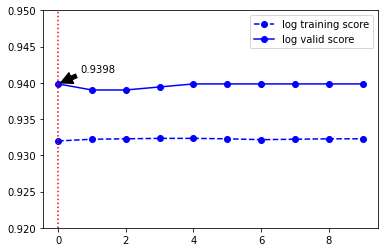

In [16]:
import matplotlib.pyplot as plt
train_log_scores=[]
test_log_scores=[]
for c in range(1,11,1):
    log_ = LogisticRegression(C=0.1*c, penalty='l1', solver='liblinear', random_state=3612)
    log_.fit(scaler.transform(X_train_nozero), y_train_t1_value)
    train_log_scores.append(log_.score(X_train_nozero, y_train_t1_value))
    test_log_scores.append(log_.score(X_valid_nozero, y_valid_t1_value))
plt.plot(train_log_scores, 'bo--')
plt.plot(test_log_scores, 'bo-')
plt.ylim(0.92, 0.95)
plt.legend(["log training score", "log valid score"])
plt.axvline(np.argmax(test_log_scores), linestyle="dotted", color="red")
plt.annotate(np.max(test_log_scores).round(4), (np.argmax(test_log_scores), np.max(test_log_scores)), xycoords="data",
                 xytext=(40, 20), textcoords="offset pixels", arrowprops=dict(facecolor="black", shrink=0.1), fontsize=10,
                 horizontalalignment="center", verticalalignment="top")
plt.show()

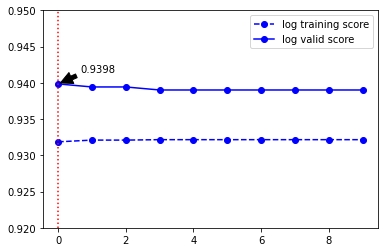

In [17]:
train_log_scores=[]
test_log_scores=[]
for c in range(1,11,1):
    log_ = LogisticRegression(C=0.1*c, penalty='l1', solver='saga', random_state=3612)
    log_.fit(scaler.transform(X_train_nozero), y_train_t1_value)
    train_log_scores.append(log_.score(X_train_nozero, y_train_t1_value))
    test_log_scores.append(log_.score(X_valid_nozero, y_valid_t1_value))
plt.plot(train_log_scores, 'bo--')
plt.plot(test_log_scores, 'bo-')
plt.ylim(0.92, 0.95)
plt.legend(["log training score", "log valid score"])
plt.axvline(np.argmax(test_log_scores), linestyle="dotted", color="red")
plt.annotate(np.max(test_log_scores).round(4), (np.argmax(test_log_scores), np.max(test_log_scores)), xycoords="data",
                 xytext=(40, 20), textcoords="offset pixels", arrowprops=dict(facecolor="black", shrink=0.1), fontsize=10,
                 horizontalalignment="center", verticalalignment="top")
plt.show()

In [18]:
scaler = StandardScaler()
scaler.fit(X_train_nozero)
log_=LogisticRegression(C=0.1, penalty='l1', solver='liblinear', random_state=3612)
sel_ = SelectFromModel(log_)
sel_.fit(scaler.transform(X_train_nozero), y_train_t1_value)
X_train_selected_t1 = pd.DataFrame(sel_.transform(scaler.transform(X_train_nozero)))
X_valid_selected_t1 = pd.DataFrame(sel_.transform(scaler.transform(X_valid_nozero)))
X_test_selected_t1 = pd.DataFrame(sel_.transform(scaler.transform(X_test_nozero)))
cols=sel_.get_support(indices=True)
headnozero_new=[]
for i in cols:
    headnozero_new.append(headnozero[i])
X_train_selected_t1.columns=headnozero_new
X_valid_selected_t1.columns=headnozero_new
X_test_selected_t1.columns=headnozero_new
X_train_selected_t1

,alanine aminotransferase,alkaline phosphate,anion gap,asparate aminotransferase,bilirubin,blood urea nitrogen,calcium,calcium ionized,chloride,co2,...,prothrombin time pt,respiratory rate,respiratory rate set,sodium,systolic blood pressure,temperature,tidal volume observed,tidal volume set,weight,white blood cell count
0,-0.288458,-0.448675,0.480040,-0.220009,-3.233569e-01,0.936056,-1.378320,-5.598335e-02,0.932613,-2.027870e+00,...,-1.187258e-01,-0.192388,4.819271e-01,0.064360,-0.867032,0.884117,5.371056e-01,6.239997e-01,1.244821,0.790869
1,-0.293777,-0.635565,1.973117,-0.292865,-5.765104e-01,2.121048,-0.351525,-1.148847e-17,-0.844641,-1.728055e+00,...,-5.260966e-01,-1.089607,-1.480117e-17,-1.068142,0.309697,-0.102469,3.751961e-17,-8.842220e-18,0.000000,-0.173856
2,-0.325687,-0.535891,-0.117191,-0.338660,-4.921259e-01,-0.351978,0.760836,-5.378030e-02,-1.022366,6.704643e-01,...,-5.034649e-01,-0.910163,-2.218059e-02,-0.615141,2.663156,0.822486,1.703934e+00,1.692524e+00,0.000000,0.190857
3,0.000000,0.000000,0.181425,0.000000,2.398447e-17,-0.248935,1.103101,-1.148847e-17,0.043986,6.704643e-01,...,-4.329408e-17,-0.192388,-1.480117e-17,0.743862,-0.537548,-0.719132,3.751961e-17,-8.842220e-18,0.000000,0.084973
4,0.000000,0.000000,-0.714421,0.000000,2.398447e-17,0.781492,0.504137,-6.920168e-02,1.110339,3.706493e-01,...,-3.450429e-01,-0.551276,2.298733e-01,1.423363,1.015735,0.514121,5.954471e-01,6.239997e-01,0.000000,-0.503274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16755,0.000000,0.000000,-0.714421,0.000000,2.398447e-17,-0.094371,0.418571,-1.148847e-17,0.043986,4.014134e-17,...,-6.845186e-01,-0.910163,-1.480117e-17,-0.162140,0.215559,-2.337736,3.751961e-17,-8.842220e-18,0.705365,-0.150326
16756,0.000000,0.000000,0.181425,0.000000,2.398447e-17,-0.300456,-0.779356,-1.148847e-17,1.998966,4.014134e-17,...,-7.346242e-02,0.345944,-1.480117e-17,0.290861,0.827458,0.051678,3.751961e-17,-8.842220e-18,1.180862,0.567335
16757,-0.304413,-0.411297,-0.117191,-0.311599,-7.020351e-02,0.214757,0.418571,-3.174975e-02,-1.200092,4.014134e-17,...,7.412792e-01,-0.012944,-1.480117e-17,-0.841642,-0.914101,-0.950335,3.751961e-17,-8.842220e-18,-0.588114,-0.550334
16758,0.000000,0.000000,-1.013036,0.000000,2.398447e-17,-0.300456,-0.608224,-1.148847e-17,1.288064,4.014134e-17,...,-6.392552e-01,-0.012944,-1.480117e-17,1.649864,1.721773,0.437067,3.751961e-17,-8.842220e-18,0.945474,-0.562099


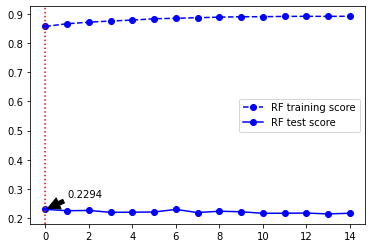

In [19]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz, export_text, plot_tree
from sklearn.ensemble import RandomForestRegressor
train_rf_scores = []
test_rf_scores = []

for depth in range(25, 40):
    rf_titanic = RandomForestRegressor(n_estimators=100, max_depth=depth, max_features=10
                                       , random_state=3612) # default is criterion="gini"
    rf_titanic.fit(X_train_nozero, y_train_t1_value.values.ravel())
    train_rf_scores.append(rf_titanic.score(X_train_nozero, y_train_t1_value))
    test_rf_scores.append(rf_titanic.score(X_valid_nozero, y_valid_t1_value))

plt.plot(train_rf_scores, 'bo--')
plt.plot(test_rf_scores, 'bo-')
plt.legend([ "RF training score", "RF test score"])
plt.axvline(np.argmax(test_rf_scores), linestyle="dotted", color="red")
plt.annotate(np.max(test_rf_scores).round(4), (np.argmax(test_rf_scores), np.max(test_rf_scores)), xycoords="data",
                 xytext=(40, 20), textcoords="offset pixels", arrowprops=dict(facecolor="black", shrink=0.1), fontsize=10,
                 horizontalalignment="center", verticalalignment="top")
plt.show()



In [20]:
scaler = StandardScaler()
scaler.fit(X_train_nozero)
rf_titanic = RandomForestRegressor(n_estimators=100, max_depth=29, max_features=10, random_state=3612)
sel_ = SelectFromModel(rf_titanic)
sel_.fit(scaler.transform(X_train_nozero), y_train_t2_value)
X_train_selected_t2 = pd.DataFrame(sel_.transform(scaler.transform(X_train_nozero)))
X_valid_selected_t2 = pd.DataFrame(sel_.transform(scaler.transform(X_valid_nozero)))
X_test_selected_t2 = pd.DataFrame(sel_.transform(scaler.transform(X_test_nozero)))
cols=sel_.get_support(indices=True)
headnozero_new2=[]
for i in cols:
    headnozero_new2.append(headnozero[i])
X_train_selected_t2.columns=headnozero_new2
X_valid_selected_t2.columns=headnozero_new2
X_test_selected_t2.columns=headnozero_new2

X_train_selected_t2

,blood urea nitrogen,calcium,diastolic blood pressure,glascow coma scale total,glucose,heart rate,hematocrit,mean blood pressure,mean corpuscular hemoglobin,mean corpuscular hemoglobin concentration,...,peak inspiratory pressure,platelets,positive end-expiratory pressure set,prothrombin time pt,red blood cell count,respiratory rate,systolic blood pressure,temperature,weight,white blood cell count
0,0.936056,-1.378320,-0.377287,-2.703429,0.055959,-0.581841,-0.219738,-0.501432,-0.058532,-0.364403,...,2.675786,0.063447,1.452283,-1.187258e-01,-0.271457,-0.192388,-0.867032,0.884117,1.244821,0.790869
1,2.121048,-0.351525,0.053867,0.825272,-0.074763,0.524096,0.466118,0.571774,-0.878825,-2.137355,...,0.000000,1.117610,0.000000,-5.260966e-01,-0.544131,-1.089607,0.309697,-0.102469,0.000000,-0.173856
2,-0.351978,0.760836,1.167682,-3.879662,0.513487,0.873339,1.053995,1.477292,-0.673752,0.292246,...,0.662180,0.348356,1.452283,-5.034649e-01,1.349435,-0.910163,2.663156,0.822486,0.000000,0.190857
3,-0.248935,1.103101,-0.449146,0.825272,-0.161911,0.931546,0.779653,-0.367281,-0.468679,0.489241,...,0.000000,0.291374,0.000000,-4.329408e-17,1.046464,-0.192388,-0.537548,-0.719132,0.000000,0.084973
4,0.781492,0.504137,0.556880,-1.527195,-1.055180,-0.698255,-0.219738,1.108377,-0.181576,0.948895,...,0.662180,-1.532045,-0.225942,-3.450429e-01,0.092107,-0.551276,1.015735,0.514121,0.000000,-0.503274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16755,-0.094371,0.418571,-0.161710,0.000000,-1.098754,-0.931084,0.387735,-0.233131,-0.140562,1.342884,...,0.000000,-0.639329,0.000000,-6.845186e-01,0.728345,-0.910163,0.215559,-2.337736,0.705365,-0.150326
16756,-0.300456,-0.779356,0.556880,0.000000,-0.989819,0.465889,-0.533272,0.370548,-0.755781,-1.612036,...,0.000000,0.946665,0.000000,-7.346242e-02,-0.544131,0.345944,0.827458,0.051678,1.180862,0.567335
16757,0.214757,0.418571,-0.017992,0.000000,-0.532291,-0.581841,-0.592060,-0.300206,1.212921,0.029586,...,0.000000,-1.057196,0.000000,7.412792e-01,-1.892349,-0.012944,-0.914101,-0.950335,-0.588114,-0.550334
16758,-0.300456,-0.608224,1.131752,0.000000,-0.270847,0.931546,-0.435293,1.041302,-0.222591,0.620570,...,0.000000,0.576283,0.000000,-6.392552e-01,-0.165418,-0.012944,1.721773,0.437067,0.945474,-0.562099


## Normalization

In [21]:
scaler = preprocessing.StandardScaler()

X_train_selected_t1=X_train_selected_t1.values
X_train_selected_t1_scaled = scaler.fit_transform(X_train_selected_t1)
X_train_selected_t1_norm=pd.DataFrame(X_train_selected_t1_scaled)

X_train_selected_t2=X_train_selected_t2.values
X_train_selected_t2_scaled = scaler.fit_transform(X_train_selected_t2)
X_train_selected_t2_norm=pd.DataFrame(X_train_selected_t2_scaled)

X_valid_selected_t1=X_valid_selected_t1.values
X_valid_selected_t1_scaled = scaler.fit_transform(X_valid_selected_t1)
X_valid_selected_t1_norm=pd.DataFrame(X_valid_selected_t1_scaled)

X_valid_selected_t2=X_valid_selected_t2.values
X_valid_selected_t2_scaled = scaler.fit_transform(X_valid_selected_t2)
X_valid_selected_t2_norm=pd.DataFrame(X_valid_selected_t2_scaled)

X_test_selected_t1=X_test_selected_t1.values
X_test_selected_t1_scaled = scaler.fit_transform(X_test_selected_t1)
X_test_selected_t1_norm=pd.DataFrame(X_test_selected_t1_scaled)

X_test_selected_t2=X_test_selected_t2.values
X_test_selected_t2_scaled = scaler.fit_transform(X_test_selected_t2)
X_test_selected_t2_norm=pd.DataFrame(X_test_selected_t2_scaled)


# Data report

In [22]:
print("*"*60)
print("There are 6 set of X")
print("X_train_selected_t1, X_train_selected_t2, X_valid_selected_t1,X_valid_selected_t2,X_test_selected_t1,X_test_selected_t2")
print("-"*60)
print("Normalized version")
print("X_train_selected_t1_norm, X_train_selected_t2_norm, X_valid_selected_t1_norm,X_valid_selected_t2_norm,X_test_selected_t1_norm,X_test_selected_t2_norm")
print("-"*60)
print("There are 4 set of Y")
print("y_train_t1, y_train_t2, y_valid_t1, y_valid_t2")
print("when training, please use: 'y_train_t1_value,y_train_t2_value,y_valid_t1_value,y_valid_t2_value'")
print("*"*60)

************************************************************
There are 6 set of X
X_train_selected_t1, X_train_selected_t2, X_valid_selected_t1,X_valid_selected_t2,X_test_selected_t1,X_test_selected_t2
------------------------------------------------------------
Normalized version
X_train_selected_t1_norm, X_train_selected_t2_norm, X_valid_selected_t1_norm,X_valid_selected_t2_norm,X_test_selected_t1_norm,X_test_selected_t2_norm
------------------------------------------------------------
There are 4 set of Y
y_train_t1, y_train_t2, y_valid_t1, y_valid_t2
when training, please use: 'y_train_t1_value,y_train_t2_value,y_valid_t1_value,y_valid_t2_value'
************************************************************
